# Runs for South Sandwich EQ(s)
updated with automatic processing

20210812TT
Loading locally stored waveforms
Working directory now:  /Users/anewman/Documents/Projects/EQerg/rterg_events/events/2021/20210812TT/00
Calculating Energy growth with time 
Running fband [0.0033333333333333335, 2.0] Hz:


100%|██████████| 16/16 [00:01<00:00,  9.04it/s]


Running fband [0.5, 2.0] Hz:


100%|██████████| 16/16 [00:01<00:00, 11.06it/s]


Length EBB and EHF 1060 1060
Calculating TACER Values


100%|██████████| 16/16 [00:01<00:00,  8.37it/s]


Median Tacer time = 270.5 -/+ 102.8/295.5 s (25/75th percentile)
From Median Tacer: --------------------------
  Mean BB Energy (Estimated)= 2.48e+16 [Me 8.03]
    1/300 - 2 Hz: 16 traces, 2.48e+16 +- 10^0.20 [J]
    1/2 - 2 Hz: 16 traces, 1.89e+14 +- 10^0.55 [J]
  Mean BB Energy (FM corrected) = 2.85e+16 [Me 8.07]
    1/300 - 2 Hz: 16 traces, 2.85e+16 +- 10^0.19 [J]
    1/2 - 2 Hz: 16 traces, 2.17e+14 +- 10^0.58 [J]
From Per-Station Tacer: ---------------------
  Mean BB Energy (Estimated)= 1.71e+16 [Me 7.92]
    1/300 - 2 Hz: 16 traces, 1.71e+16 +- 10^0.29 [J]
    1/2 - 2 Hz: 16 traces, 1.56e+14 +- 10^0.44 [J]
  Mean BB Energy (FM corrected) = 1.97e+16 [Me 7.96]
    1/300 - 2 Hz: 16 traces, 1.97e+16 +- 10^0.34 [J]
    1/2 - 2 Hz: 16 traces, 1.79e+14 +- 10^0.49 [J]
writing results



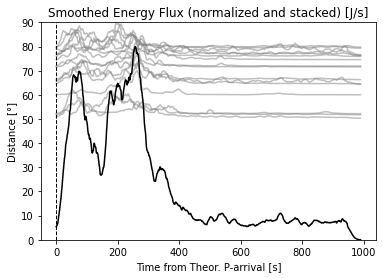

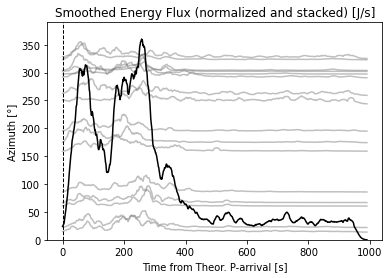

colorbar [WARNING]: Your -D option was interpreted to mean -Dx


CPU times: user 31.9 s, sys: 582 ms, total: 32.5 s
Wall time: 11.6 s


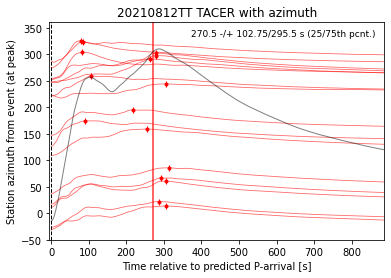

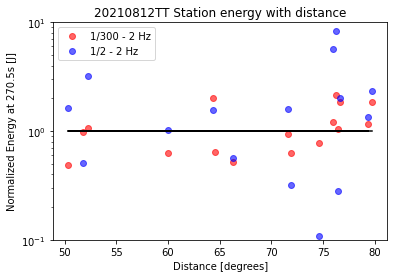

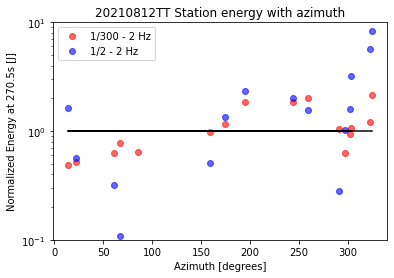

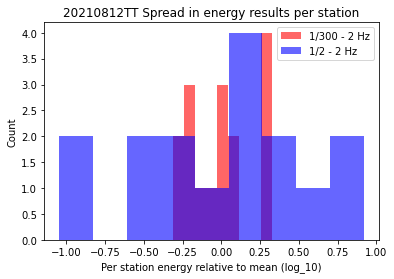

In [1]:
%%time 
from rtergpy.run import defaults, event, etime2name, src2ergs
from obspy import UTCDateTime

Defaults=defaults()
Event=event()

# m7.5 South Sandwich  # strange and very large event
Event.newData=False

eloc = [-57.567,-25.032,47]  # USGS loc and origin 
etime= UTCDateTime(2021,8,12,18,32,52)  
Event.ecount='TT'
Event.eventname=etime2name(etime,ecount=Event.ecount)
print(Event.eventname)
Event.origin=[eloc,etime]
Event.focmech=[106, 26, 56] # phi,delta,lmbda
#Event.focmech=[0, 90, 0] # phi,delta,lmbda
# nearer stations more contaminated
Defaults.waveparams[1][1]=1000 # =postPtime
Defaults.stationrange=[50,80]  # reducing later phase contamination
Defaults.smoothkern=20

src2ergs(Defaults=Defaults, Event=Event)  # need to export run output in a coherent way

# plot energy as a function of distance

## Run src2erg locally for further investigation

Working directory now:  /Users/anewman/Documents/Projects/EQerg/rterg_events/events/2021/20210812TT/00
Calculating Energy growth with time 
Running fband [0.0033333333333333335, 2.0] Hz:


100%|██████████| 16/16 [00:01<00:00, 10.72it/s]


Running fband [0.5, 2.0] Hz:


100%|██████████| 16/16 [00:01<00:00, 11.16it/s]


Length EBB and EHF 1060 1060
Calculating TACER Values


100%|██████████| 16/16 [00:01<00:00,  8.09it/s]


Median Tacer time = 267.5 -/+ 101.0/289.8 s (25/75th percentile)
From Median Tacer: --------------------------
  Mean BB Energy (Estimated)= 2.41e+16 [Me 8.02]
    1/300 - 2 Hz: 16 traces, 2.41e+16 +- 10^0.20 [J]
    1/2 - 2 Hz: 16 traces, 1.86e+14 +- 10^0.55 [J]
  Mean BB Energy (FM corrected) = 2.77e+16 [Me 8.06]
    1/300 - 2 Hz: 16 traces, 2.77e+16 +- 10^0.18 [J]
    1/2 - 2 Hz: 16 traces, 2.14e+14 +- 10^0.58 [J]
From Per-Station Tacer: ---------------------
  Mean BB Energy (Estimated)= 1.69e+16 [Me 7.92]
    1/300 - 2 Hz: 16 traces, 1.69e+16 +- 10^0.29 [J]
    1/2 - 2 Hz: 16 traces, 1.55e+14 +- 10^0.44 [J]
  Mean BB Energy (FM corrected) = 1.94e+16 [Me 7.96]
    1/300 - 2 Hz: 16 traces, 1.94e+16 +- 10^0.34 [J]
    1/2 - 2 Hz: 16 traces, 1.78e+14 +- 10^0.49 [J]
writing results



colorbar [WARNING]: Your -D option was interpreted to mean -Dx


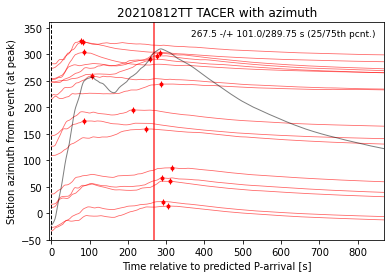

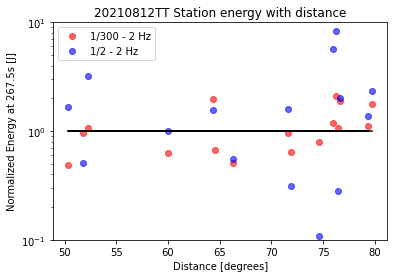

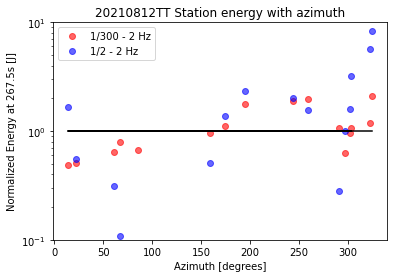

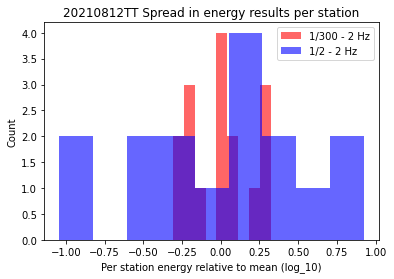

In [2]:
# run src2erg locally to do further interrogation
from rtergpy.waveforms import loadwaves,eventdir,ErgsFromWaves,tacer,tacerstats,gmeanCut,e2Me,trstat2pd
from rtergpy.plotting import fbandlabels, tacerplot,Edistplot,Eazplot,Ehistogram,stationEmapPygmt 
import pandas as pd
import numpy as np

eventname=Event.eventname
st,df=loadwaves(Defaults=Defaults,Event=Event) 
# remove any additional locations at same site (or site repeats!)
STATCHAN0=''
for tr in st:
    STATCHAN=str(tr.stats.network)+str(tr.stats.station)
    if STATCHAN == STATCHAN0:
        st.remove(tr)
    STATCHAN0=STATCHAN

# work in event directory 
edirit,origwd=eventdir(Defaults=Defaults,Event=Event,create=False,cd=True)

# create an array of station data 
trdf=pd.DataFrame()
for tr in st:
    trdf=trdf.append(trstat2pd(tr),ignore_index=True)

print("Calculating Energy growth with time ")
# Calculate energies over all waves
EBB,EHF,Emd=ErgsFromWaves(st,Defaults,Event)   
print("Length EBB and EHF", len(EBB),len(EHF))
# get tacer values and fist derivatives 
print("Calculating TACER Values")
kern=10  # 1/2 width of gauss @ 1sig
EBBSmooth=EBB.rolling(kern,win_type='gaussian',center=True, closed='both').mean(std=kern/2)
dEBBdt=EBB.diff()
dEBBdtSmooth=EBBSmooth.diff()

EHFSmooth=EHF.rolling(kern,win_type='gaussian',center=True, closed='both').mean(std=kern/2)
dEHFdt=EHF.diff()
dEHFdtSmooth=EHFSmooth.diff()

prePtime=Defaults.waveparams[1][0]
tacerBB=tacer(dEBBdtSmooth,prePtime=prePtime)
tacerHF=tacer(dEHFdtSmooth,prePtime=prePtime)
ttimes,meds = tacerstats(tacerHF) 
ttimeHF,ttimeHF25,ttimeHF75=ttimes
print("Median Tacer time = %.1f -/+ %.1f/%.1f s (25/75th percentile)" %(ttimeHF,ttimeHF25,ttimeHF75))

intval=int(ttimeHF-prePtime)  # median tacer time from start of waveforms
ebbmedtac=np.array(EBB.iloc[intval])  # list of EBB values at *median* tacer
ehfmedtac=np.array(EHF.iloc[intval])  # list of EBB values at *median* tacer
# corrected values for focmech
ebbcorrmedtac=np.array(list(ebbmedtac*np.array(Emd.est2corr)))
ehfcorrmedtac=np.array(list(ehfmedtac*np.array(Emd.est2corr)))

# Energy values at per station tacer
ebbpertac=[]
ehfpertac=[]
for i in range(0,len(meds)):
    ebbpertac = np.append(ebbpertac, EBB.iloc[meds['time at max'][i]-prePtime][i])
    ehfpertac = np.append(ehfpertac, EHF.iloc[meds['time at max'][i]-prePtime][i])

ebbcorrpertac=np.array(list(ebbpertac*np.array(Emd.est2corr)))
ehfcorrpertac=np.array(list(ehfpertac*np.array(Emd.est2corr)))


# cutoff=15 # 15x +/-  # moved into defaults
cutoff=Defaults.cutoff
labelbb,labelhf=fbandlabels(Emd)

print("From Median Tacer: --------------------------")
ebbmedtacmean,keepbb=gmeanCut(ebbmedtac,cutoff=cutoff)
ehfmedtacmean,keephf=gmeanCut(ehfmedtac,cutoff=cutoff)
ebbmedtacmeanerr10=np.std(np.log10(keepbb))
ehfmedtacmeanerr10=np.std(np.log10(keephf))
print("  Mean BB Energy (Estimated)= %.2e [Me %.2f]" %(ebbmedtacmean,e2Me(ebbmedtacmean)))
print("    %s: %d traces, %.2e +- 10^%.2f [J]" %(labelbb,len(keepbb), ebbmedtacmean, ebbmedtacmeanerr10))
print("    %s: %d traces, %.2e +- 10^%.2f [J]" %(labelhf,len(keephf), ehfmedtacmean, ehfmedtacmeanerr10))
ebbcorrmedtacmean,keepbb=gmeanCut(ebbcorrmedtac,cutoff=cutoff)
ehfcorrmedtacmean,keephf=gmeanCut(ehfcorrmedtac,cutoff=cutoff)
ebbcorrmedtacmeanerr10=np.std(np.log10(keepbb))
ehfcorrmedtacmeanerr10=np.std(np.log10(keephf))
print("  Mean BB Energy (FM corrected) = %.2e [Me %.2f]" %(ebbcorrmedtacmean,e2Me(ebbcorrmedtacmean)))
print("    %s: %d traces, %.2e +- 10^%.2f [J]" %(labelbb,len(keepbb), ebbcorrmedtacmean, ebbcorrmedtacmeanerr10))
print("    %s: %d traces, %.2e +- 10^%.2f [J]" %(labelhf,len(keephf), ehfcorrmedtacmean, ehfcorrmedtacmeanerr10))

print("From Per-Station Tacer: ---------------------")
ebbpertacmean,keepbb=gmeanCut(ebbpertac,cutoff=cutoff)
ehfpertacmean,keephf=gmeanCut(ehfpertac,cutoff=cutoff)
ebbpertacmeanerr10=np.std(np.log10(keepbb))
ehfpertacmeanerr10=np.std(np.log10(keephf))
print("  Mean BB Energy (Estimated)= %.2e [Me %.2f]" %(ebbpertacmean,e2Me(ebbpertacmean)))
print("    %s: %d traces, %.2e +- 10^%.2f [J]" %(labelbb,len(keepbb), ebbpertacmean, ebbpertacmeanerr10))
print("    %s: %d traces, %.2e +- 10^%.2f [J]" %(labelhf,len(keephf), ehfpertacmean, ehfpertacmeanerr10))
ebbcorrpertacmean,keepbb=gmeanCut(ebbcorrpertac,cutoff=cutoff)
ehfcorrpertacmean,keephf=gmeanCut(ehfcorrpertac,cutoff=cutoff)
ebbcorrpertacmeanerr10=np.std(np.log10(keepbb))
ehfcorrpertacmeanerr10=np.std(np.log10(keephf))
print("  Mean BB Energy (FM corrected) = %.2e [Me %.2f]" %(ebbcorrpertacmean,e2Me(ebbcorrpertacmean)))
print("    %s: %d traces, %.2e +- 10^%.2f [J]" %(labelbb,len(keepbb), ebbcorrpertacmean, ebbcorrpertacmeanerr10))
print("    %s: %d traces, %.2e +- 10^%.2f [J]" %(labelhf,len(keephf), ehfcorrpertacmean, ehfcorrpertacmeanerr10))
#print("Mean BB Energy (FM corrected) = %.2e [Me %.2f]" %(emeanbbcorr,e2Me(emeanbbcorr)))

# Saving information  ################################
# create dataframe with Event based results
results=pd.DataFrame({
    "eventname":eventname,"iteration":Event.iter,   # name/run
    "etime":Event.origin[1],"elat":Event.origin[0][0],"elon":Event.origin[0][1],"edepth":Event.origin[0][2], "focmech":[Event.focmech],   # Event
    "network":Defaults.network, "chan":Defaults.chan, "stationrange":[Defaults.stationrange], "nstats":len(trdf), #stations 
    "fbands":[Defaults.waveparams[0]], "pwindow":[Defaults.waveparams[1]],  # wave params
    "eventdir":df.eventdir, "modtime":UTCDateTime(),      # where and when processed
    "cutoff":Defaults.cutoff, "ttimes":[ttimes],  # Results (and below)
    "ebbmedtacmean":ebbmedtacmean, "STD10(medtac)":ebbmedtacmeanerr10, "Me(medtac)":e2Me(ebbmedtacmean), "ehfmedtacmean":ehfmedtacmean, "STD10(hfmedtac)":ehfmedtacmeanerr10,
    "ebbcorrmedtacmean":ebbcorrmedtacmean, "STD10(corr)":ebbcorrmedtacmeanerr10, "Me(corr)":e2Me(ebbcorrmedtacmean), "ehfcorrmedtacmean":ehfcorrmedtacmean, "STD10(hfcorr)":ehfcorrmedtacmeanerr10,
    "ebbpertacmean":ebbpertacmean, "STD10(per)":ebbpertacmeanerr10, "Me(per)":e2Me(ebbpertacmean), "ehfpertacmean":ehfpertacmean, "STD10(hfper)":ehfpertacmeanerr10,
    "ebbcorrpertacmean":ebbcorrpertacmean, "STD10(percorr)":ebbcorrpertacmeanerr10, "Me(corrper)":e2Me(ebbcorrpertacmean), "ehfcorrpertacmean":ehfcorrpertacmean, "STD10(hfpercorr)":ehfcorrpertacmeanerr10
    }, dtype=object)

# time-series energy results
Etimeseries=pd.concat([EBB,EHF,EBBSmooth,EHFSmooth,dEBBdtSmooth,dEHFdtSmooth,tacerBB,tacerHF],
    keys=["EBB","EHF","EBBSmooth","EHFSmooth","dEBBdtSmooth","dEHFdtSmooth","tacerBB","tacerHF"])
    # individual key can be extracted using (e.g. Energy.loc["EHF"])

# per-station information
ETace=pd.DataFrame({'tacer':meds['time at max'],
    'ebbmedtac':ebbmedtac, 'ehfmedtac':ehfmedtac,
    'ebbcorrmedtac':ebbcorrmedtac, 'ehfcorrmedtac':ehfcorrmedtac,
    'ebbpertac':ebbpertac, 'ehfpertac':ehfpertac,
    'ebbcorrpertac':ebbcorrpertac, 'ehfcorrpertac':ehfcorrpertac
    })
ETace=ETace.reset_index(drop=True)
StationTacer=pd.concat([trdf,Emd[["estFgP2","FgP2","est2corr"]],ETace],axis=1)

# save results to files
try:
    print("writing results\n")
    # csv    
    results.to_csv("Results_"+eventname+".csv")
    Etimeseries.to_csv("Etimeseries_"+eventname+".csv")
    StationTacer.to_csv("ETacer_"+eventname+".csv") 
    # pkls 
    if not os.path.exists('pkls'):   # create and go into pkls dir
        os.mkdir('pkls')
    os.chdir('pkls')
    results.to_pickle("Results_"+eventname+".pkl")
    Etimeseries.to_pickle("Etimeseries_"+eventname+".pkl")
    StationTacer.to_pickle("Etacer_"+eventname+".pkl")
    os.chdir('..')
except:
    print("ERROR: writing results for"+eventname)

# Create plots
try:
    if not os.path.exists('figs'):   # create and go into pkls dir
        os.mkdir('figs')
    os.chdir('figs')    
    tacerplot(tacerHF,trdf,ttimes,meds,eventname,show=False)
    Edistplot(EBB,EHF,Emd,trdf,eventname,ttimeHF, prePtime=prePtime,show=False,cutoff=cutoff)
    Eazplot(EBB,EHF,Emd,trdf,eventname,ttimeHF, prePtime=prePtime,show=False,cutoff=cutoff)
    Ehistogram(EBB,EHF,Emd,eventname,ttimeHF, prePtime=prePtime,show=False,cutoff=cutoff)
    stationEmapPygmt(EBB,Event.origin[0],trdf,eventname,ttimeHF, prePtime=prePtime,cutoff=15,itername=Event.iter,show=False)
    os.chdir('..')
except:
    print("ERROR: plotting results for "+eventname)

os.chdir(origwd)  # go back to old directory


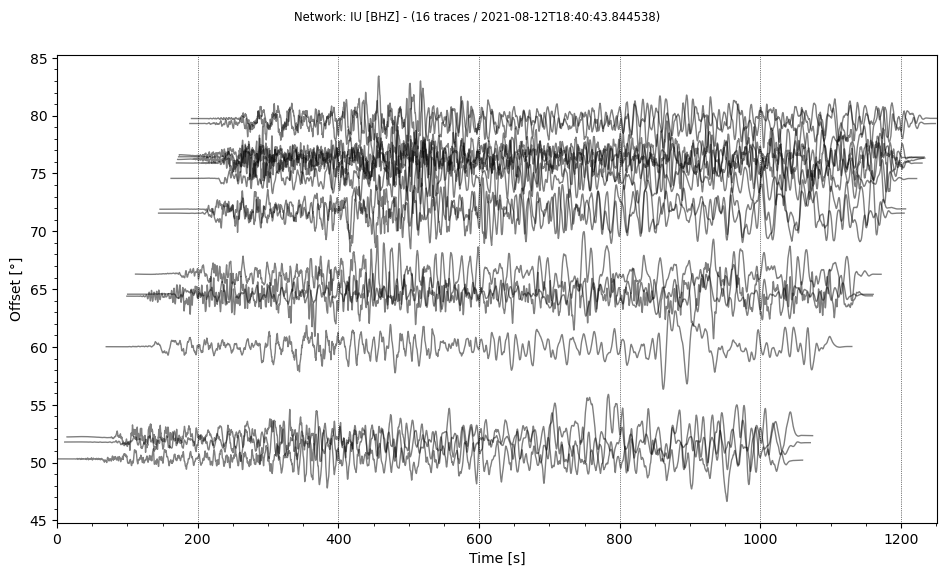

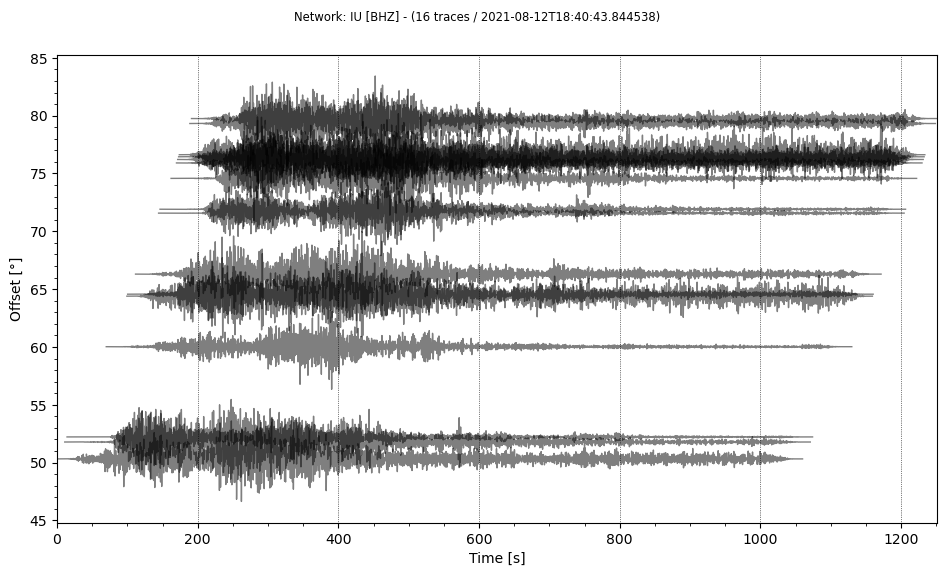

In [3]:
from rtergpy.waveforms import tacerstats,trstat2pd,e2Me,process_waves
import matplotlib.pyplot as plt
# simple Moveout plt
st1=process_waves(st,freqmin=.001,freqmax=2)
st1.plot(type='section', dist_degree=True, ev_coord=[eloc[0], eloc[1]], orientation='horizontal', scale=3);

st2=process_waves(st,freqmin=.5,freqmax=2)
st2.plot(type='section', dist_degree=True, ev_coord=[eloc[0], eloc[1]], orientation='horizontal', scale=3);

#tr.plot(type='section', scale=5, dist_degree=True, ev_coord=[eloc[0],eloc[1]], orientation='horizontal', reftime=etime);

In [4]:
trdf

,netstatchan,network,station,location,channel,starttime,endtime,phasePtime,sampling_rate,delta,npts,calib,az,baz,coordinates,distance,pinc,prayp,ptoa
0,CU.BBGH.00.BHZ,CU,BBGH,00,BHZ,2021-08-12T18:43:35.350001Z,2021-08-12T19:01:15.350001Z,2021-08-12T18:44:35.359069Z,40.0,0.025,42401,1.0,325.2662,161.670054,"[13.1434, -59.5588]","[8452161.70618602, 76.2106970359]",17.230084,325.370908,24.439493
1,CU.GRGR.00.BHZ,CU,GRGR,00,BHZ,2021-08-12T18:43:33.644538Z,2021-08-12T19:01:13.644538Z,2021-08-12T18:44:33.651425Z,40.0,0.025,42401,1.0,322.932044,160.646437,"[12.1324, -61.654]","[8419830.74687802, 75.9105831895]",17.298742,326.627884,24.540124
2,GT.DBIC.00.BHZ,GT,DBIC,00,BHZ,2021-08-12T18:42:35.450000Z,2021-08-12T19:00:15.450000Z,2021-08-12T18:43:35.450389Z,40.0,0.025,42401,1.0,22.036532,191.716562,"[6.67015, -4.85653]","[7351422.5023605, 66.2990950016]",19.521529,367.058613,27.822948
3,GT.LPAZ.00.BHZ,GT,LPAZ,00,BHZ,2021-08-12T18:40:58.075000Z,2021-08-12T18:58:38.075000Z,2021-08-12T18:41:58.086219Z,40.0,0.025,42401,1.0,303.81609,152.276584,"[-16.287923, -68.130714]","[5805050.842912765, 52.2219839007]",22.787764,425.449561,32.750997
4,II.ABPO.00.BHZ,II,ABPO,00,BHZ,2021-08-12T18:42:24.219538Z,2021-08-12T19:00:04.219538Z,2021-08-12T18:43:24.217240Z,20.0,0.05,21201,1.0,85.763322,214.532885,"[-19.018, 47.229]","[7185545.976863893, 64.5627809218]",19.922676,374.298075,28.420987
5,II.ASCN.10.BHZ,II,ASCN,10,BHZ,2021-08-12T18:40:43.844538Z,2021-08-12T18:58:23.844538Z,2021-08-12T18:41:43.843460Z,40.0,0.025,42401,1.0,13.827256,187.45319,"[-7.9327, -14.3601]","[5582778.268534158, 50.321694509]",23.23473,433.336711,33.436892
6,II.MBAR.00.BHZ,II,MBAR,00,BHZ,2021-08-12T18:43:10.244536Z,2021-08-12T19:00:50.244536Z,2021-08-12T18:44:10.242155Z,40.0,0.025,42401,1.0,60.557176,207.916849,"[-0.6019, 30.7382]","[7987483.137573939, 71.9086444469]",18.228864,343.609392,25.907756
7,II.NNA.00.BHZ,II,NNA,00,BHZ,2021-08-12T18:41:53.819539Z,2021-08-12T18:59:33.819539Z,2021-08-12T18:42:53.813737Z,20.0,0.05,21201,1.0,297.314127,150.775387,"[-11.9875, -76.8422]","[6672046.336868397, 60.0227655044]",20.969322,393.099528,29.990325
8,II.RPN.00.BHZ,II,RPN,00,BHZ,2021-08-12T18:42:23.119538Z,2021-08-12T19:00:03.119538Z,2021-08-12T18:43:23.094620Z,20.0,0.05,21201,1.0,259.055697,143.65531,"[-27.1267, -109.3344]","[7172532.472261142, 64.391088094]",19.96188,375.004608,28.479532
9,II.TAU.00.BHZ,II,TAU,00,BHZ,2021-08-12T18:43:52.669538Z,2021-08-12T19:01:32.669538Z,2021-08-12T18:44:52.650123Z,20.0,0.05,21201,1.0,174.312579,184.164881,"[-42.9099, 147.3204]","[8845459.20975099, 79.319452257]",16.499136,311.960289,23.370761


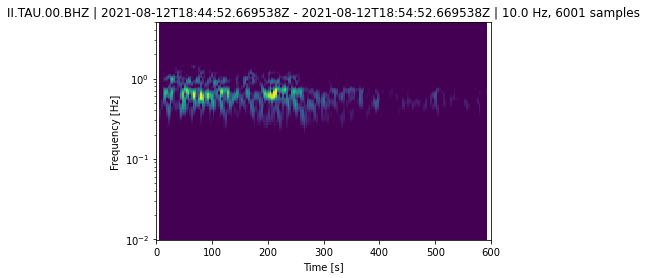

In [5]:
from rtergpy.waveforms import process_waves
ntr=9
st1=st[ntr]
# raw
#st1.plot()
# BB
tr1=process_waves(st1,freqmin=.01,freqmax=2)
#tr1.plot()
# HF
tr2=process_waves(st1,freqmin=.5,freqmax=2)
#tr2.plot()
#plt.show()
tr2.trim(tr2.stats.starttime+60,tr2.stats.starttime+60+600)
tr2.spectrogram(per_lap=0.75,wlen=10,mult=4,clip=[.1,.9],log=True)
#tr.plot(type='section', scale=5, dist_degree=True, ev_coord=[eloc[0],eloc[1]], orientation='horizontal', reftime=etime);

In [6]:
EBB,EHF,Emd =ErgsFromWaves(st,Defaults=Defaults, Event=Event)

Running fband [0.0033333333333333335, 2.0] Hz:


100%|██████████| 16/16 [00:01<00:00, 10.32it/s]


Running fband [0.5, 2.0] Hz:


100%|██████████| 16/16 [00:01<00:00, 10.21it/s]


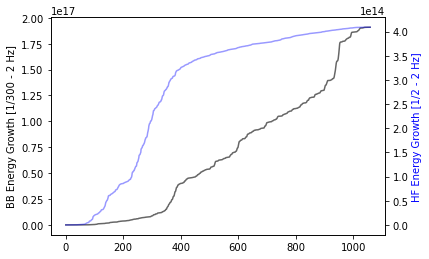

In [7]:
from rtergpy.plotting import Etincplot

Etincplot(EBB,EHF,Emd,trdf,ntr=5)

# create other time series products (testing)

In [8]:
trdf

,netstatchan,network,station,location,channel,starttime,endtime,phasePtime,sampling_rate,delta,npts,calib,az,baz,coordinates,distance,pinc,prayp,ptoa
0,CU.BBGH.00.BHZ,CU,BBGH,00,BHZ,2021-08-12T18:43:35.350001Z,2021-08-12T19:01:15.350001Z,2021-08-12T18:44:35.359069Z,40.0,0.025,42401,1.0,325.2662,161.670054,"[13.1434, -59.5588]","[8452161.70618602, 76.2106970359]",17.230084,325.370908,24.439493
1,CU.GRGR.00.BHZ,CU,GRGR,00,BHZ,2021-08-12T18:43:33.644538Z,2021-08-12T19:01:13.644538Z,2021-08-12T18:44:33.651425Z,40.0,0.025,42401,1.0,322.932044,160.646437,"[12.1324, -61.654]","[8419830.74687802, 75.9105831895]",17.298742,326.627884,24.540124
2,GT.DBIC.00.BHZ,GT,DBIC,00,BHZ,2021-08-12T18:42:35.450000Z,2021-08-12T19:00:15.450000Z,2021-08-12T18:43:35.450389Z,40.0,0.025,42401,1.0,22.036532,191.716562,"[6.67015, -4.85653]","[7351422.5023605, 66.2990950016]",19.521529,367.058613,27.822948
3,GT.LPAZ.00.BHZ,GT,LPAZ,00,BHZ,2021-08-12T18:40:58.075000Z,2021-08-12T18:58:38.075000Z,2021-08-12T18:41:58.086219Z,40.0,0.025,42401,1.0,303.81609,152.276584,"[-16.287923, -68.130714]","[5805050.842912765, 52.2219839007]",22.787764,425.449561,32.750997
4,II.ABPO.00.BHZ,II,ABPO,00,BHZ,2021-08-12T18:42:24.219538Z,2021-08-12T19:00:04.219538Z,2021-08-12T18:43:24.217240Z,20.0,0.05,21201,1.0,85.763322,214.532885,"[-19.018, 47.229]","[7185545.976863893, 64.5627809218]",19.922676,374.298075,28.420987
5,II.ASCN.10.BHZ,II,ASCN,10,BHZ,2021-08-12T18:40:43.844538Z,2021-08-12T18:58:23.844538Z,2021-08-12T18:41:43.843460Z,40.0,0.025,42401,1.0,13.827256,187.45319,"[-7.9327, -14.3601]","[5582778.268534158, 50.321694509]",23.23473,433.336711,33.436892
6,II.MBAR.00.BHZ,II,MBAR,00,BHZ,2021-08-12T18:43:10.244536Z,2021-08-12T19:00:50.244536Z,2021-08-12T18:44:10.242155Z,40.0,0.025,42401,1.0,60.557176,207.916849,"[-0.6019, 30.7382]","[7987483.137573939, 71.9086444469]",18.228864,343.609392,25.907756
7,II.NNA.00.BHZ,II,NNA,00,BHZ,2021-08-12T18:41:53.819539Z,2021-08-12T18:59:33.819539Z,2021-08-12T18:42:53.813737Z,20.0,0.05,21201,1.0,297.314127,150.775387,"[-11.9875, -76.8422]","[6672046.336868397, 60.0227655044]",20.969322,393.099528,29.990325
8,II.RPN.00.BHZ,II,RPN,00,BHZ,2021-08-12T18:42:23.119538Z,2021-08-12T19:00:03.119538Z,2021-08-12T18:43:23.094620Z,20.0,0.05,21201,1.0,259.055697,143.65531,"[-27.1267, -109.3344]","[7172532.472261142, 64.391088094]",19.96188,375.004608,28.479532
9,II.TAU.00.BHZ,II,TAU,00,BHZ,2021-08-12T18:43:52.669538Z,2021-08-12T19:01:32.669538Z,2021-08-12T18:44:52.650123Z,20.0,0.05,21201,1.0,174.312579,184.164881,"[-42.9099, 147.3204]","[8845459.20975099, 79.319452257]",16.499136,311.960289,23.370761


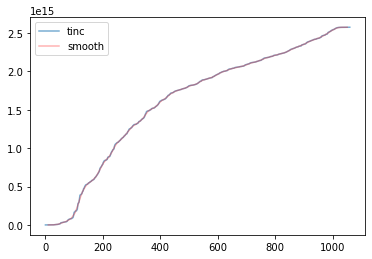

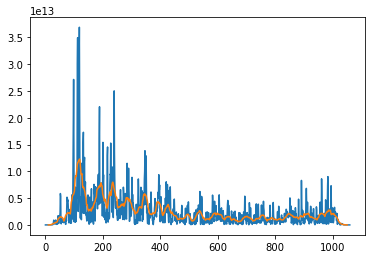

In [9]:
# create smoothed and 1st derivative products
kern=20
ntr=0
#smoothed=eEtinc_BB["CU.ANWB.00.BHZ"].rolling(kern,win_type='gaussian',center=True, closed='both').mean(std=kern/2)#.round(kern*2)
EHFsmooth=EHF.rolling(kern,win_type='gaussian',center=True, closed='both').mean(std=kern/2)
dEdtHF=EHF.diff()
dEdtHFsmooth=EHFsmooth.diff()
#EtincBBsmooth["CU.ANWB.00.BHZ"].plot()
EHF.iloc[:,ntr].plot(alpha=0.6,label="tinc")
EHFsmooth.iloc[:,ntr].plot(alpha=0.3,color='red',label="smooth")
plt.legend()
plt.show()
dEdtHF.iloc[:,ntr].plot()
dEdtHFsmooth.iloc[:,ntr].plot()
#smoothed.plot()
plt.show()


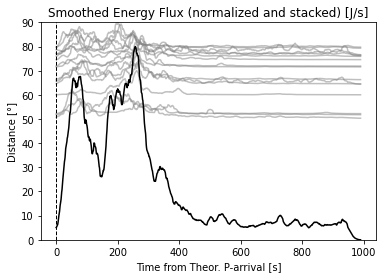

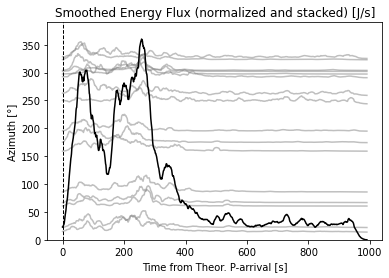

In [10]:
from rtergpy.plotting import Efluxplots
Efluxplots(dEdtHFsmooth, trdf, eventname)